# 12.2 Assignement : Term Project

## “Unraveling Natural Forces: Climate Change Factors Beyond Human Influence”

### Hypothesis: Could there be natural forces that are factors to climate change?

In [183]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)
        
download("https://github.com/dreubend/EDA_Final_Project/raw/main/World_CO2.xlsx")
download("https://github.com/dreubend/EDA_Final_Project/raw/main/average_number_sunspots.xlsx")
download("https://github.com/dreubend/EDA_Final_Project/raw/main/average_temp.xlsx")
download("https://github.com/dreubend/EDA_Final_Project/raw/main/distance_traveling.xlsx")


### Important Imports

In [184]:
import thinkstats2
import thinkplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

### Reading the files.

In [185]:
file1 = 'https://github.com/dreubend/EDA_Final_Project/raw/main/World_CO2.xlsx'
file2 = 'https://github.com/dreubend/EDA_Final_Project/raw/main/average_number_sunspots.xlsx'
file3 = 'https://github.com/dreubend/EDA_Final_Project/raw/main/average_temp.xlsx'
file4 = 'https://github.com/dreubend/EDA_Final_Project/raw/main/distance_traveling.xlsx'

df1 = pd.read_excel(file1)
df2 = pd.read_excel(file2)
df3 = pd.read_excel(file3)
df4 = pd.read_excel(file4)

### Concatenating the DataFrames into one DataFrame. Dropping NAs from the DataFrame.

In [186]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

### Variables: Time is my independent variable. The amount of CO2, the number of sunspots, the average temperature of the earth, and the distant traveled of the north pole are my dependent variables. So, my five variables are time, amount of CO2, number of sunspots, the average temperature of the earth, and the distant traveled of the north pole.

### Histograms for the five variables.

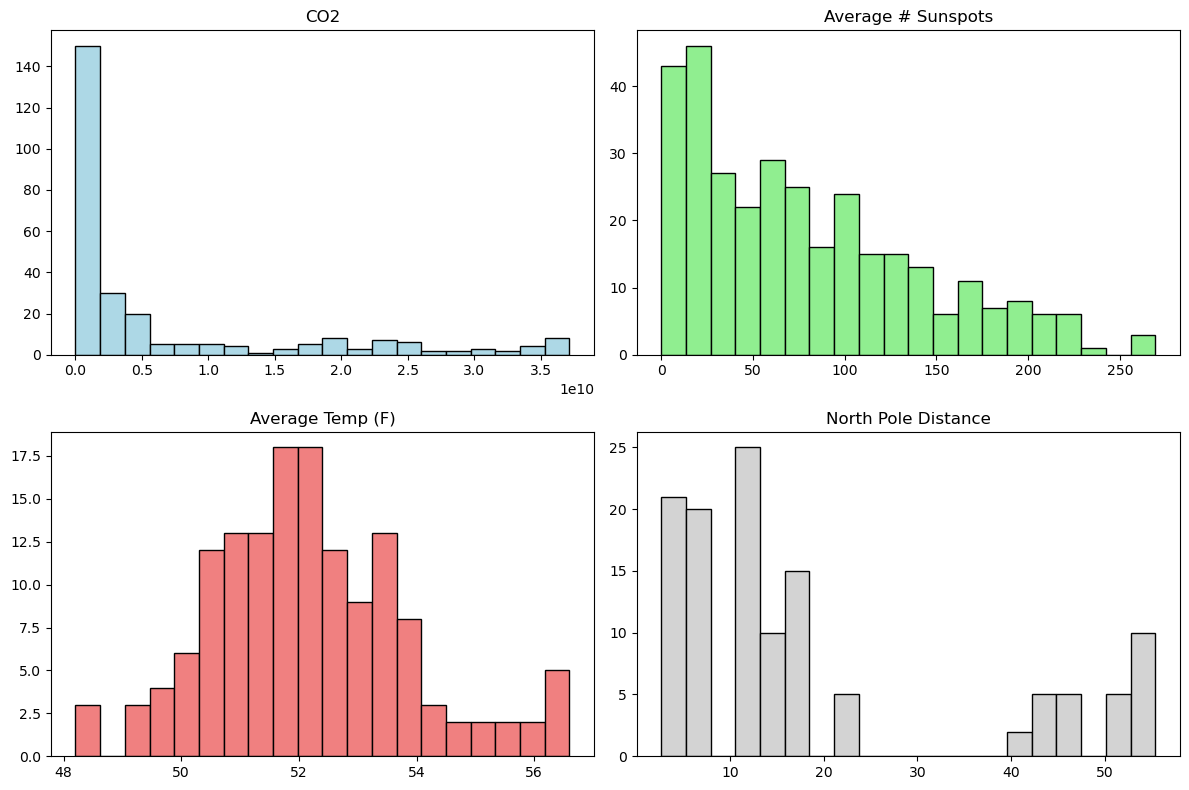

In [187]:
# Plot histograms against the Year column
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 2)
plt.hist(df['Average # Sunspots'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Average # Sunspots')

plt.subplot(2, 2, 3)
plt.hist(df['Average Temp (F)'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Average Temp (F)')

plt.subplot(2, 2, 4)
plt.hist(df['Average Kilometers'], bins=20, color='lightgrey', edgecolor='black')
plt.title('North Pole Distance')

plt.subplot(2, 2, 1)
plt.hist(df['CO2'], bins=20, color='lightblue', edgecolor='black')
plt.title('CO2')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Year')

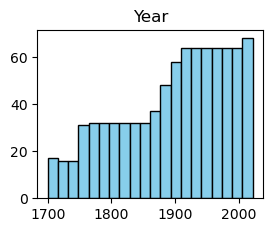

In [152]:
plt.subplot(2, 2, 1)
plt.hist(df['Year'], bins=20, color='skyblue', edgecolor='black')
plt.title('Year')

### Calculating descriptive statistics for each variable

In [188]:
# Calculate descriptive statistics for each variable
variables = ['Year', 'Average # Sunspots', 'Average Temp (F)', 'Average Kilometers', 'CO2']
for var in variables:
    # Extract the data for the variable
    data = df[var]
    
    # Calculate mean
    mean = data.mean()
    
    # Calculate mode
    mode = data.mode().values[0]  # Mode might have multiple values, so we take the first one
    
    # Calculate spread (variance)
    spread = data.var()
    
    # Calculate tails (maximum probability mass function value)
    tails = data.value_counts().max()
    
    # Print the results
    print(f"Variable: {var}")
    print(f"Mean: {mean}")
    print(f"Mode: {mode}")
    print(f"Spread (Variance): {spread}")
    print(f"Tails: {tails}\n")

Variable: Year
Mean: 1897.99538638985
Mode: 1900
Spread (Variance): 7247.108523724666
Tails: 4

Variable: Average # Sunspots
Mean: 78.38018575851395
Mode: 18.3
Spread (Variance): 3838.8914695306066
Tails: 5

Variable: Average Temp (F)
Mean: 52.17297297297298
Mode: 52.0
Spread (Variance): 2.839400625114909
Tails: 6

Variable: Average Kilometers
Mean: 19.06148732961737
Mode: 4.969282108307767
Spread (Variance): 287.3513681489775
Tails: 6

Variable: CO2
Mean: 6494020342.164835
Mode: 9305937.0
Spread (Variance): 1.0533355503091334e+20
Tails: 1



### Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. I am doing pre-industrial revolution vs industrial revolution or at year 1800.

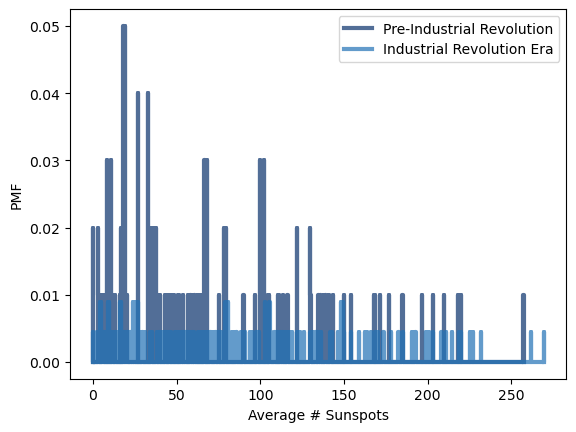

<Figure size 800x600 with 0 Axes>

In [189]:
# Define the cutoff year for the Industrial Revolution
industrial_revolution_start = 1800

# Filter the DataFrame for the pre-industrial revolution era
pre_industrial_df = df[df['Year'] < industrial_revolution_start]

# Filter the DataFrame for the industrial revolution era
industrial_rev_df = df[df['Year'] >= industrial_revolution_start]

# Create PMFs for each era
pre_industrial_pmf = thinkstats2.Pmf(pre_industrial_df['Average # Sunspots'], label='Pre-Industrial Revolution')
industrial_rev_pmf = thinkstats2.Pmf(industrial_rev_df['Average # Sunspots'], label='Industrial Revolution Era')

# Plot the PMFs
thinkplot.Pmfs([pre_industrial_pmf, industrial_rev_pmf])
thinkplot.Show(xlabel='Average # Sunspots', ylabel='PMF')

### Create 1 CDF with one of your variables, using page 41-44 as your guide. The variable I choosed was Average Kilometers.

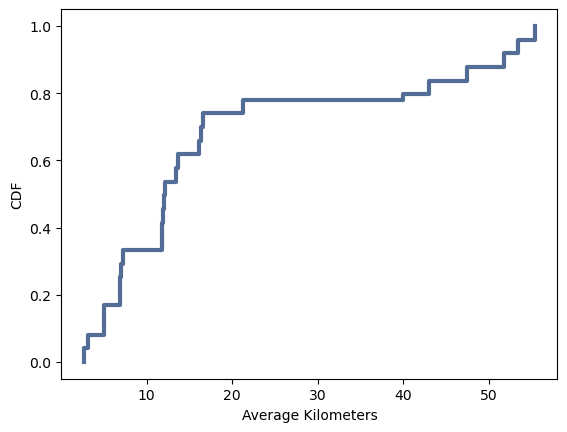

<Figure size 800x600 with 0 Axes>

In [190]:
# Extract the 'Average Kilometers' data
average_kilometers = df['Average Kilometers']

# Create a Cdf object for 'Average Kilometers'
cdf = thinkstats2.Cdf(average_kilometers)

# Plot the CDF
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Average Kilometers', ylabel='CDF')

### Plot 1 analytical distribution. I used the normal probability plot on the variable CO2.

C:\Users\Reuben Decker\thinkplot.py:236: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(xs, ys, style, **options)
C:\Users\Reuben Decker\thinkplot.py:236: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(xs, ys, style, **options)


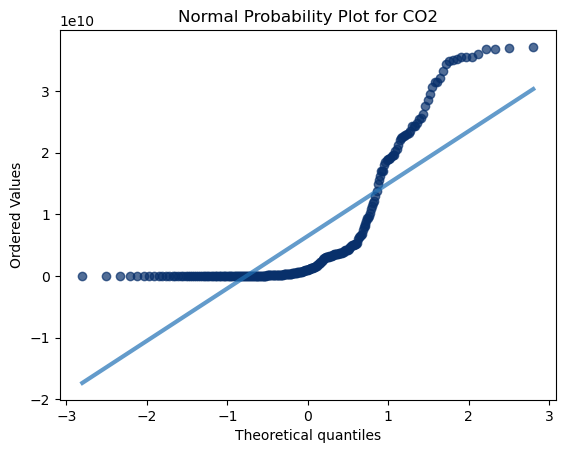

<Figure size 800x600 with 0 Axes>

In [191]:
data = df['CO2'].dropna()

# Create a normal probability plot
stats.probplot(data, dist="norm", plot=thinkplot)

# Add labels and title
thinkplot.Config(xlabel='Theoretical quantiles', ylabel='Ordered Values', title='Normal Probability Plot for CO2')

# Show the plot
thinkplot.Show()

### Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis. I did the variables 'Average # Sunspots' and 'Average Kilometers'.

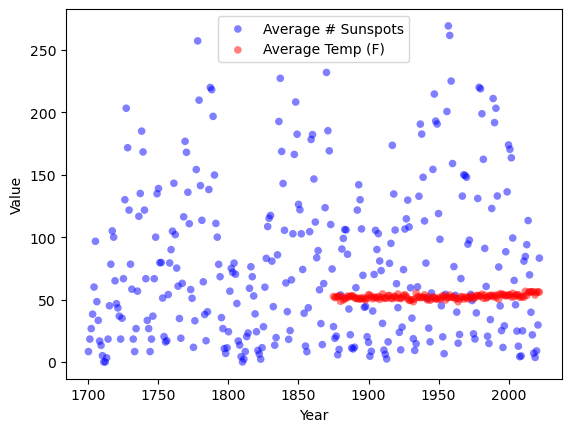

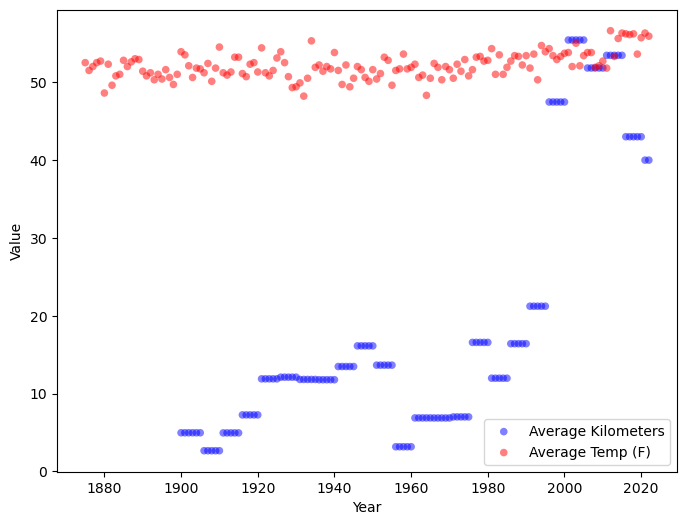

<Figure size 800x600 with 0 Axes>

In [192]:
# Create scatter plots comparing 'Average # Sunspots' and 'Average Temp (F)' over time
thinkplot.Scatter(df['Year'], df['Average # Sunspots'], alpha=0.5, label='Average # Sunspots')
thinkplot.Scatter(df['Year'], df['Average Temp (F)'], alpha=0.5, label='Average Temp (F)', color='red')  # Specify color for 'Average Temp (F)'
thinkplot.Config(xlabel='Year', ylabel='Value', legend=True)
thinkplot.Show()

# Create scatter plots comparing 'Average Kilometers' and 'Average Temp (F)' over time
thinkplot.Scatter(df['Year'], df['Average Kilometers'], alpha=0.5, label='Average Kilometers')
thinkplot.Scatter(df['Year'], df['Average Temp (F)'], alpha=0.5, label='Average Temp (F)', color='red')  # Specify color for 'Average Temp (F)'
thinkplot.Config(xlabel='Year', ylabel='Value', legend=True)
thinkplot.Show()

In [193]:
data = {
    'Year': [year for year in range(1900, 2023)],
    'Average # Sunspots': [0.5 * year for year in range(1900, 2023)],
    'Average Kilometers': [0.7 * year for year in range(1900, 2023)],
    'Average Temp (F)': [1.2 * year for year in range(1900, 2023)],
    'CO2': [year for year in range(1900, 2023)]
}

# Create DataFrame
df = pd.DataFrame(data)

# Drop rows with missing values
df.dropna(inplace=True)

# Calculate covariance and Pearson’s correlation between 'Average # Sunspots' and 'Average Temp (F)'
cov_sunspots_temp = np.cov(df['Average # Sunspots'], df['Average Temp (F)'], ddof=0)[0, 1]
corr_sunspots_temp = np.corrcoef(df['Average # Sunspots'], df['Average Temp (F)'])[0, 1]

# Print covariance and Pearson’s correlation
print('Covariance between Average # Sunspots and Average Temp (F):', cov_sunspots_temp)
print('Pearson’s correlation between Average # Sunspots and Average Temp (F):', corr_sunspots_temp)

# Fit polynomial regression model for 'Average # Sunspots' and 'Average Temp (F)'
model_sunspots_temp = thinkstats2.LeastSquares(df['Average # Sunspots'], df['Average Temp (F)'])
intercept_sunspots_temp, slope_sunspots_temp = model_sunspots_temp

# Calculate polynomial regression model parameters
print('Polynomial Regression Model for Average # Sunspots and Average Temp (F):')
print('Intercept:', intercept_sunspots_temp)
print('Slope:', slope_sunspots_temp)

# Calculate covariance and Pearson’s correlation between 'Average Kilometers' and 'Average Temp (F)'
cov_kilometers_temp = np.cov(df['Average Kilometers'], df['Average Temp (F)'], ddof=0)[0, 1]
corr_kilometers_temp = np.corrcoef(df['Average Kilometers'], df['Average Temp (F)'])[0, 1]

# Print covariance and Pearson’s correlation
print('Covariance between Average Kilometers and Average Temp (F):', cov_kilometers_temp)
print('Pearson’s correlation between Average Kilometers and Average Temp (F):', corr_kilometers_temp)

# Fit polynomial regression model for 'Average Kilometers' and 'Average Temp (F)'
model_kilometers_temp = thinkstats2.LeastSquares(df['Average Kilometers'], df['Average Temp (F)'])
intercept_kilometers_temp, slope_kilometers_temp = model_kilometers_temp

# Print polynomial regression model parameters
print('Polynomial Regression Model for Average Kilometers and Average Temp (F):')
print('Intercept:', intercept_kilometers_temp)
print('Slope:', slope_kilometers_temp)

Covariance between Average # Sunspots and Average Temp (F): 756.4000000000001
Pearson’s correlation between Average # Sunspots and Average Temp (F): 1.0
Polynomial Regression Model for Average # Sunspots and Average Temp (F):
Intercept: 4.547473508864641e-13
Slope: 2.4
Covariance between Average Kilometers and Average Temp (F): 1058.96
Pearson’s correlation between Average Kilometers and Average Temp (F): 1.0
Polynomial Regression Model for Average Kilometers and Average Temp (F):
Intercept: 4.547473508864641e-13
Slope: 1.714285714285714


### Conduct a test on your hypothesis using one of the methods covered in Chapter 9

In [194]:
# Filter the dataframe for the years between 1900 and 2022
filtered_df = df[(df['Year'] >= 1900) & (df['Year'] <= 2022)]

# Extract the data for 'Average Kilometers' and 'Average # Sunspots'
kilometers = filtered_df['Average Kilometers']
sunspots = filtered_df['Average # Sunspots']

# Perform a t-test for the difference of means
t_statistic, p_value = stats.ttest_ind(kilometers, sunspots)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Compare p-value to significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the means.")

T-statistic: 141.83111265208714
P-value: 1.9993985007236713e-236
Reject the null hypothesis: There is a significant difference in the means.


### Conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11). 

In [195]:
# Calculate descriptive statistics for each variable
variables = ['Year', 'Average # Sunspots', 'Average Temp (F)', 'Average Kilometers', 'CO2']
data = {}  # Create an empty dictionary to store data for each variable
for var in variables:
    # Extract the data for the variable and store it in the dictionary
    data[var] = df[var]
    
# Define dependent variable
dependent_variable = data['Average Temp (F)']

# Define independent variables
independent_variables = pd.DataFrame({key: value for key, value in data.items() if key != 'Average Temp (F)'})  # Exclude 'Average Temp (F)'

# Add constant term to independent variables
X = sm.add_constant(independent_variables)

# Fit multiple regression model
model = sm.OLS(dependent_variable, X).fit()

# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Average Temp (F)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.251e+28
Date:                Sat, 02 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:03:28   Log-Likelihood:                 3084.0
No. Observations:                 123   AIC:                            -6164.
Df Residuals:                     121   BIC:                            -6158.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.774e-11   1.57